# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [606]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


## Dataset File

In [ ]:
scaler = MinMaxScaler()


dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)
df = df.drop("PassengerId", axis=1) # not needed
df = df.drop("Name", axis=1) # not needed
df = df.drop("Cabin", axis=1) # 80% Missing
df = df.drop("Ticket", axis=1) # 80% Missing
df = df.drop("Parch", axis=1) #
# df = df.drop("Fare", axis=1) #
df['Fare'] = scaler.fit_transform(df[['Fare']])
# df = df.drop("Embarked", axis=1)
df = pd.get_dummies(df, columns=["Pclass", "Sex", "Embarked"]) # classify Pclass and sex
df = df.drop(["Pclass_3", "Sex_female", "Embarked_C"], axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = scaler.fit_transform(df[['Age']])
for col in ['Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_Q', 'Embarked_S']:
    df[col] = df[col].astype(int)

df.head(n=20)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    int64  
 5   Pclass_2    891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


/tmp/ipython-input-3429840629.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [608]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x = df.drop("Survived", axis=1)
x = sm.add_constant(x)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, stratify=y, random_state=1)


In [609]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver="sag", random_state=10)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=10, solver='sag')

In [610]:
model.score(x_test, y_test)

0.8888888888888888

In [611]:
# import statsmodels.api as sm

# x_train = x_train.dropna()
# y_train = y_train.loc[x_train.index]  # align labels


# model = sm.Logit(y_train.astype(float), x_train.astype(float)).fit()
# print(model.summary())

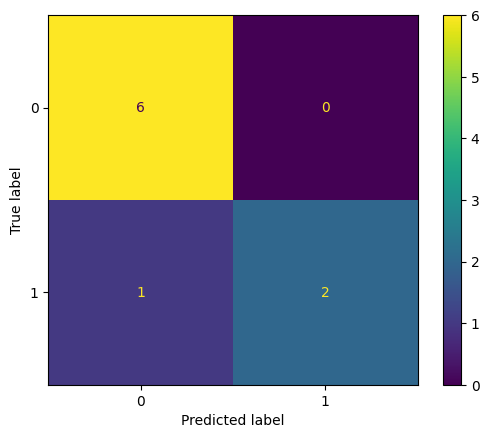

In [612]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

## Test File

In [613]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')

test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)


dt = dt.drop("Name", axis=1) # not needed
dt = dt.drop("Cabin", axis=1) # 80% Missing
dt = dt.drop("Ticket", axis=1) # 80% Missing
dt = dt.drop("Parch", axis=1) #
# dt = dt.drop("Fare", axis=1) #
dt['Fare'] = scaler.fit_transform(dt[['Fare']])
dt['Fare'].fillna(dt['Fare'].median(), inplace=True)
# dt = dt.drop("Embarked", axis=1)
dt = pd.get_dummies(dt, columns=["Pclass", "Sex", "Embarked"]) # classify Pclass and sex
dt = dt.drop(["Pclass_3", "Sex_female", "Embarked_C"], axis=1)
dt['Age'].fillna(dt['Age'].median(), inplace=True)
dt['Age'] = scaler.fit_transform(dt[['Age']])
for col in ['Pclass_1', 'Pclass_2', 'Sex_male', 'Embarked_Q', 'Embarked_S']:
    dt[col] = dt[col].astype(int)

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Pclass_1     418 non-null    int64  
 5   Pclass_2     418 non-null    int64  
 6   Sex_male     418 non-null    int64  
 7   Embarked_Q   418 non-null    int64  
 8   Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


/tmp/ipython-input-3369330005.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Fare'].fillna(dt['Fare'].median(), inplace=True)
/tmp/ipython-input-3369330005.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [614]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Pclass_1     418 non-null    int64  
 5   Pclass_2     418 non-null    int64  
 6   Sex_male     418 non-null    int64  
 7   Embarked_Q   418 non-null    int64  
 8   Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


## Sample Submission File

In [615]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [616]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [617]:


id = dt['PassengerId']
dt = sm.add_constant(dt)
dt = dt.drop(["PassengerId"], axis=1)
y_pred = model.predict(dt)



In [618]:
# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
